In [2]:
import pandas as pd

df = pd.read_csv('real_estate_price_size_year.csv')

df.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [3]:
df.columns

Index(['price', 'size', 'year'], dtype='object')

In [6]:
import pandas as pd
import datetime

df = pd.read_csv('real_estate_price_size_year.csv')

current_year = datetime.datetime.now().year
df['property_age'] = current_year - df['year']

df.drop('year', axis=1, inplace=True)


In [7]:
df.head()

,price,size,property_age
0,234314.144,643.09,10
1,228581.528,656.22,16
2,281626.336,487.29,7
3,401255.608,1504.75,10
4,458674.256,1275.46,16


In [8]:
df['price_per_size'] = df['price'] / df['size']
df['age_score'] = df['property_age'].apply(lambda x: 1 if x < 20 else 0)  # new <20 years


In [9]:
def score_property(row):
    score = 0
    # undervalued if price per size < threshold
    if row['price_per_size'] < 2000:  # adjust threshold based on your data
        score += 1
    # newer property bonus
    score += row['age_score']
    return score

df['investment_score'] = df.apply(score_property, axis=1)


In [11]:
# Top 10 investment-worthy properties
top_properties = df.sort_values('investment_score', ascending=False).head(10)
print(top_properties)


        price     size  property_age  price_per_size  age_score  \
0  234314.144   643.09            10      364.356690          1   
1  228581.528   656.22            16      348.330633          1   
2  281626.336   487.29             7      577.944009          1   
3  401255.608  1504.75            10      266.659317          1   
4  458674.256  1275.46            16      359.614771          1   
5  245050.280   575.19            19      426.033624          1   
6  265129.064   570.89            10      464.413572          1   
7  175716.480   620.82            19      283.039335          1   
8  331101.344   682.26             7      485.300830          1   
9  218630.608   694.52            16      314.793826          1   

   investment_score  
0               2.0  
1               2.0  
2               2.0  
3               2.0  
4               2.0  
5               2.0  
6               2.0  
7               2.0  
8               2.0  
9               2.0  


In [12]:
import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
df = pd.read_csv('real_estate_price_size_year.csv')

# Convert year → age
import datetime
current_year = datetime.datetime.now().year
df['property_age'] = current_year - df['year']

# Price per size
df['price_per_size'] = df['price'] / df['size']

# Detect outliers using Z-score
df['price_zscore'] = np.abs(stats.zscore(df['price_per_size']))

# Mark as fake if z-score > threshold (e.g., 3)
df['is_fake'] = df['price_zscore'].apply(lambda x: 1 if x > 3 else 0)

# View fake properties
fake_properties = df[df['is_fake'] == 1]
print(fake_properties)


        price    size  year  property_age  price_per_size  price_zscore  \
2  281626.336  487.29  2018             7      577.944009      3.469306   

   is_fake  
2        1  


In [13]:
# Mark impossible properties
df['impossible_age'] = df['property_age'].apply(lambda x: 1 if x < 0 or x > 200 else 0)

# Combine with fake detection
df['is_fake'] = df.apply(lambda row: 1 if row['is_fake']==1 or row['impossible_age']==1 else 0, axis=1)


In [14]:
df.head()

,price,size,year,property_age,price_per_size,price_zscore,is_fake,impossible_age
0,234314.144,643.09,2015,10,364.356690,0.142665,0,0
1,228581.528,656.22,2009,16,348.330633,0.106942,0,0
2,281626.336,487.29,2018,7,577.944009,3.469306,1,0
3,401255.608,1504.75,2015,10,266.659317,1.378980,0,0
4,458674.256,1275.46,2009,16,359.614771,0.068809,0,0


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime

# Step 1: Load CSV
df = pd.read_csv('real_estate_price_size_year.csv')

# Step 2: Convert year → property_age
current_year = datetime.datetime.now().year
df['property_age'] = current_year - df['year']

# Step 3: Compute price per size
df['price_per_size'] = df['price'] / df['size']

# Step 4: Detect fake properties using z-score
df['price_zscore'] = np.abs(stats.zscore(df['price_per_size']))
df['is_fake'] = df['price_zscore'].apply(lambda x: 1 if x > 3 else 0)

# Step 5: Detect impossible ages
df['impossible_age'] = df['property_age'].apply(lambda x: 1 if x < 0 or x > 200 else 0)

# Combine fake detection
df['is_fake'] = df.apply(lambda row: 1 if row['is_fake']==1 or row['impossible_age']==1 else 0, axis=1)

# Step 6: View fake properties
fake_properties = df[df['is_fake'] == 1]
print("Fake or suspicious properties:")
print(fake_properties)

# Step 7: Simple scoring for real properties only
def score_property(row):
    score = 0
    if row['is_fake'] == 0:  # only real properties
        if row['price_per_size'] < 2000:  # undervalued threshold
            score += 1
        if row['property_age'] < 20:  # newer property bonus
            score += 0.5
    return score

df['investment_score'] = df.apply(score_property, axis=1)

# Step 8: Rank properties
top_properties = df[df['is_fake'] == 0].sort_values('investment_score', ascending=False)
print("\nTop investment properties:")
print(top_properties.head(10))


Fake or suspicious properties:
        price    size  year  property_age  price_per_size  price_zscore  \
2  281626.336  487.29  2018             7      577.944009      3.469306   

   is_fake  impossible_age  
2        1               0  

Top investment properties:
         price     size  year  property_age  price_per_size  price_zscore  \
0   234314.144   643.09  2015            10      364.356690      0.142665   
1   228581.528   656.22  2009            16      348.330633      0.106942   
3   401255.608  1504.75  2015            10      266.659317      1.378980   
4   458674.256  1275.46  2009            16      359.614771      0.068809   
5   245050.280   575.19  2006            19      426.033624      1.103289   
6   265129.064   570.89  2015            10      464.413572      1.701060   
7   175716.480   620.82  2006            19      283.039335      1.123860   
8   331101.344   682.26  2018             7      485.300830      2.026380   
9   218630.608   694.52  2009          

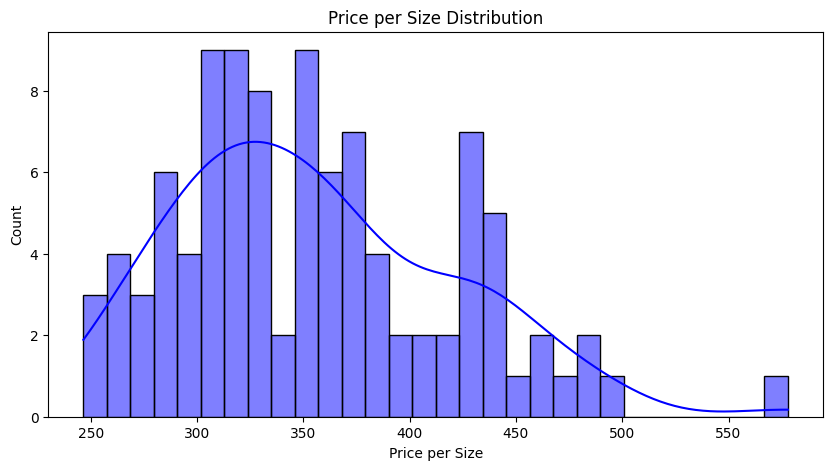

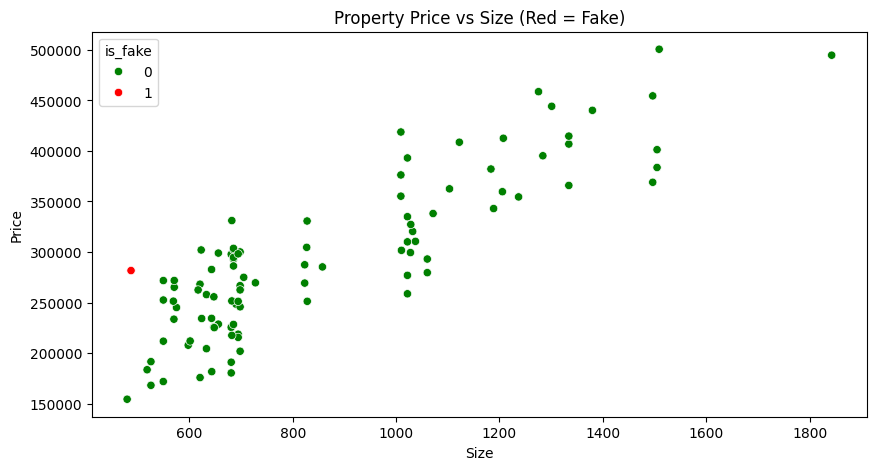

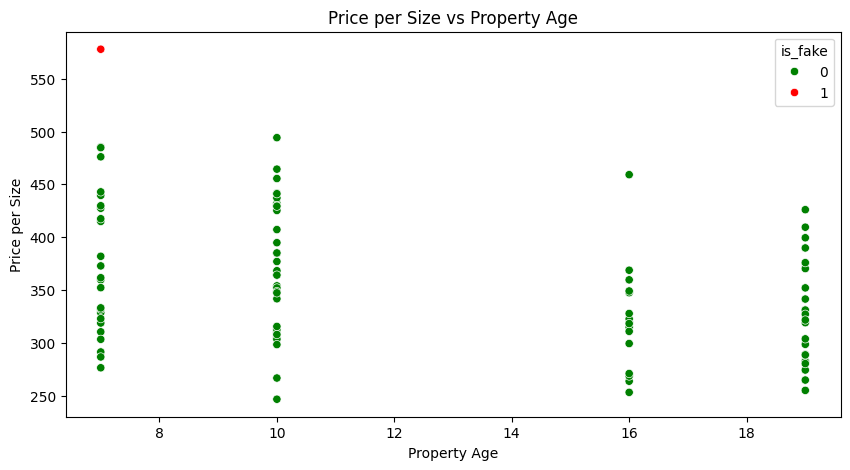

C:\Users\Uzair\AppData\Local\Temp\ipykernel_14484\2949456567.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='size', data=top_investments, palette='viridis')


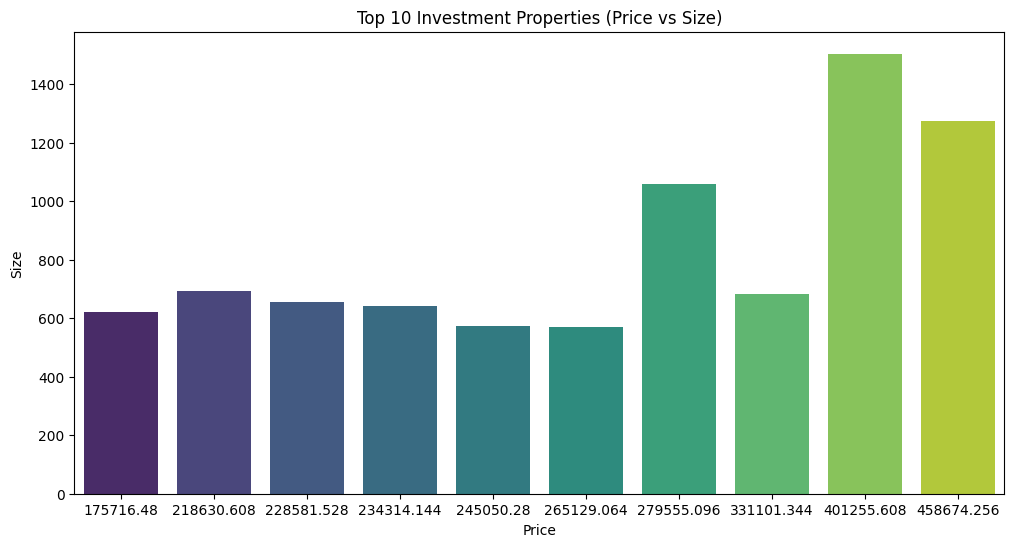

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Price per size distribution
plt.figure(figsize=(10,5))
sns.histplot(df['price_per_size'], bins=30, color='blue', kde=True)
plt.title('Price per Size Distribution')
plt.xlabel('Price per Size')
plt.ylabel('Count')
plt.show()

# Step 2: Highlight fake properties in distribution
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='size', y='price', hue='is_fake', palette={0:'green', 1:'red'})
plt.title('Property Price vs Size (Red = Fake)')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

# Step 3: Property Age vs Price per Size
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='property_age', y='price_per_size', hue='is_fake', palette={0:'green',1:'red'})
plt.title('Price per Size vs Property Age')
plt.xlabel('Property Age')
plt.ylabel('Price per Size')
plt.show()

# Step 4: Top investment properties
top_investments = df[df['is_fake']==0].sort_values('investment_score', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='price', y='size', data=top_investments, palette='viridis')
plt.title('Top 10 Investment Properties (Price vs Size)')
plt.xlabel('Price')
plt.ylabel('Size')
plt.show()


In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np

# Tax amount in dollars
df['tax_amount'] = np.random.randint(1000, 15000, len(df))

# Zoning type
df['zoning_type'] = np.random.choice(['residential','commercial','industrial'], len(df))

# Off-market flag
df['is_off_market'] = np.random.choice([0,1], len(df))

# Number of nearby listings
df['num_nearby_listings'] = np.random.randint(0,20, len(df))


In [8]:
df['NOI'] = df['estimated_rent'] * 12 * 0.8  # 20% expenses
df['cap_rate'] = df['NOI'] / df['price']
df['cash_invested'] = df['price'] * 0.2
df['cash_on_cash_return'] = df['NOI'] / df['cash_invested']


KeyError: 'estimated_rent'

Top investment properties:
         price    size  year  estimated_rent       ROI  cap_rate  \
23  183459.488  518.38  2015            4995  0.326721  0.261377   
47  201778.048  698.29  2006            4965  0.295275  0.236220   
88  211904.536  601.66  2018            4952  0.280428  0.224343   
46  204302.976  633.19  2009            4864  0.285693  0.228555   
12  215472.104  694.52  2015            4841  0.269603  0.215683   
73  211724.096  549.80  2015            4749  0.269162  0.215329   
9   218630.608  694.52  2009            4557  0.250121  0.200096   
32  207742.248  597.90  2009            4269  0.246594  0.197275   
80  180307.216  681.07  2006            3618  0.240789  0.192631   
1   228581.528  656.22  2009            4363  0.229047  0.183238   

    cash_on_cash_return  future_yield  
23             1.306883      0.340004  
47             1.181100      0.312427  
88             1.121713      0.305017  
46             1.142773      0.298263  
12             1.078413 

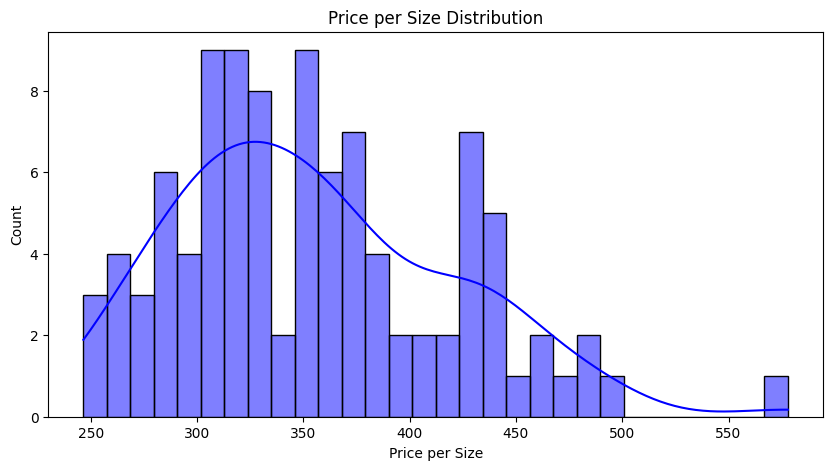

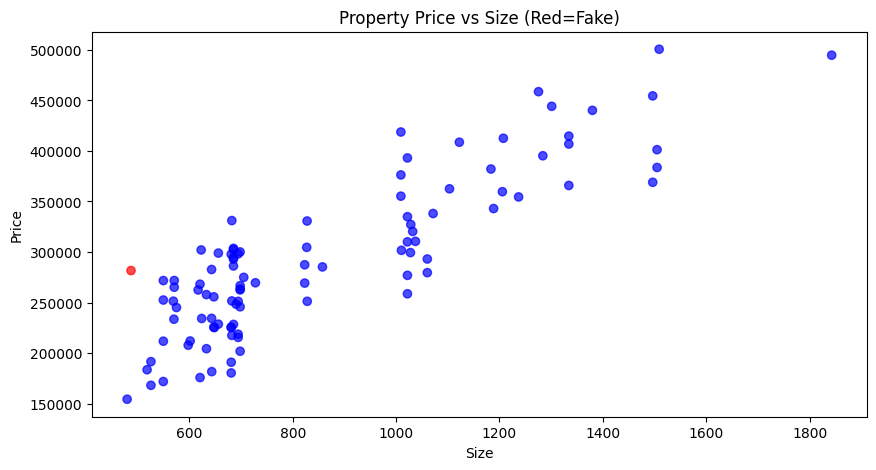

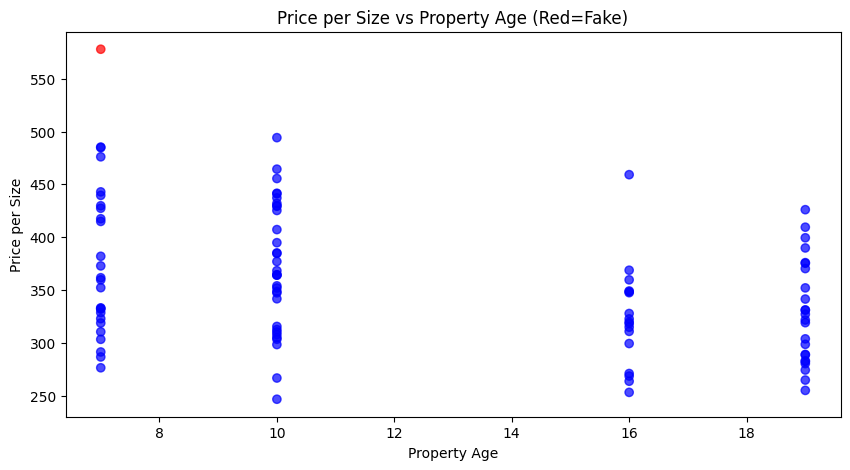

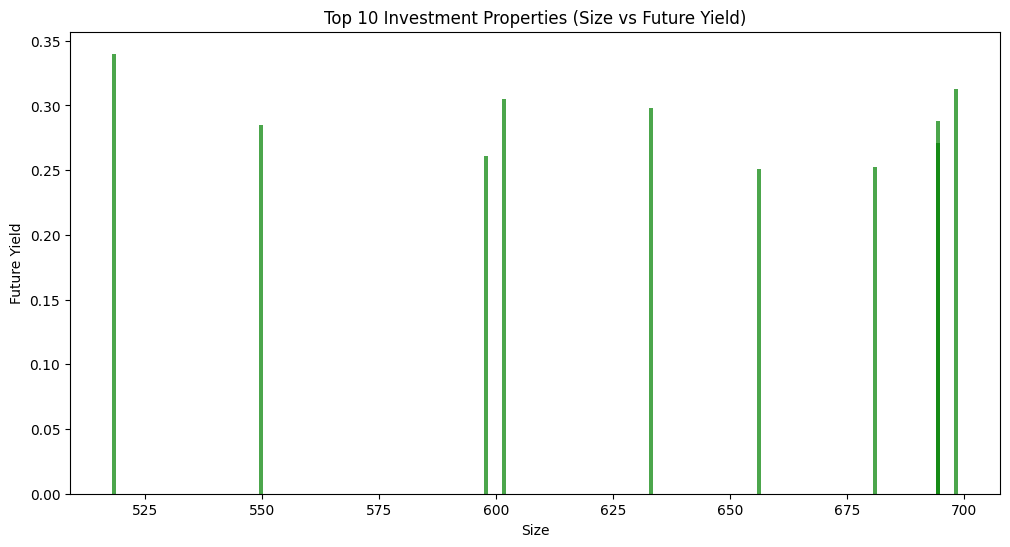

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime
import matplotlib.pyplot as plt


df = pd.read_csv('real_estate_price_size_year.csv')


current_year = datetime.datetime.now().year
df['property_age'] = current_year - df['year']
df['price_per_size'] = df['price'] / df['size']


df['price_zscore'] = np.abs(stats.zscore(df['price_per_size']))
df['is_fake'] = df.apply(
    lambda row: 1 if row['price_zscore']>3 or row['property_age']<0 or row['property_age']>200 else 0,
    axis=1
)


np.random.seed(42)
df['tax_amount'] = np.random.randint(1000, 15000, len(df))
df['zoning_type'] = np.random.choice(['residential','commercial','industrial'], len(df))
df['is_off_market'] = np.random.choice([0,1], len(df))
df['num_nearby_listings'] = np.random.randint(0,20, len(df))


df['estimated_rent'] = np.random.randint(500, 5000, len(df))


df['NOI'] = df['estimated_rent'] * 12 * 0.8
df['cap_rate'] = df['NOI'] / df['price']
df['cash_invested'] = df['price'] * 0.2
df['cash_on_cash_return'] = df['NOI'] / df['cash_invested']
df['ROI'] = (df['estimated_rent'] * 12) / df['price']
df['predicted_rent_growth'] = np.random.uniform(0.01, 0.1, len(df))
df['future_yield'] = df['ROI'] * (1 + df['predicted_rent_growth'])


top_properties = df[df['is_fake']==0].sort_values('future_yield', ascending=False).head(10)
print("Top investment properties:")
print(top_properties[['price','size','year','estimated_rent','ROI','cap_rate','cash_on_cash_return','future_yield']])


plt.figure(figsize=(10,5))
sns.histplot(df['price_per_size'], bins=30, color='blue', kde=True)
plt.title('Price per Size Distribution')
plt.xlabel('Price per Size')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(df['size'], df['price'], c=df['is_fake'], cmap='bwr', alpha=0.7)
plt.title('Property Price vs Size (Red=Fake)')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(df['property_age'], df['price_per_size'], c=df['is_fake'], cmap='bwr', alpha=0.7)
plt.title('Price per Size vs Property Age (Red=Fake)')
plt.xlabel('Property Age')
plt.ylabel('Price per Size')
plt.show()


plt.figure(figsize=(12,6))
plt.bar(top_properties['size'], top_properties['future_yield'], color='green', alpha=0.7)
plt.title('Top 10 Investment Properties (Size vs Future Yield)')
plt.xlabel('Size')
plt.ylabel('Future Yield')
plt.show()
